## 단일 객체 저장 및 불러오기

In [1]:
import numpy as np

# 단일 객체 생성
array = np.arange(0, 10)
print(array)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
# numpy 형태로 저장
np.save('save.npy', array)

In [3]:
# numpy 데이터 불렁괴
result = np.load('save.npy')
# 출력
print(result)

[0 1 2 3 4 5 6 7 8 9]


## 복수 객체 저장 및 불러오기

In [5]:
import numpy as np

# 복수 객체 생성
array1 = np.arange(0, 10)
array2 = np.arange(10, 20)
print(array1, array2)

# numpy 저장
np.savez('save.npz', array1=array1, array2=array2)

# numpy 불러오기
data = np.load('save.npz')

# 객체 불러오기
result1 = data['array1']
result2 = data['array2']
print(result1, result2)

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]
[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]


## Numpy에서 많이 사용되는 함수
1. 원소의 정렬

In [6]:
import numpy as np

# 오름차누 정렬
array = np.array([5, 10, 20, 30, 2])
array.sort()
print(array)

[ 2  5 10 20 30]


In [8]:
# 내림차순 정렬
print(array[::-1])

[30 20 10  5  2]


In [10]:
# 각 열, 행을 기준으로 정렬
array = np.array([[5,10,20,30,2], [7,3,5,62,6]])
org_array = array.copy()
# 각 열을 기준으로 정렬 전
print('각 열을 기준으로 정렬 전 \n', array)

# 각 열을 기준으로 정렬 후
array.sort(axis=0)
print("각 열을 기준으로 정렬 후 \n", array)

# 각 행을 기준으로 정렬 전
print("각 행을 기준으로 정렬 전 \n", org_array)

# 각 행을 기준으로 정렬 후
org_array.sort(axis=1)
print("각 행을 기준으로 정렬 후 \n", org_array)

각 열을 기준으로 정렬 전 
 [[ 5 10 20 30  2]
 [ 7  3  5 62  6]]
각 열을 기준으로 정렬 후 
 [[ 5  3  5 30  2]
 [ 7 10 20 62  6]]
각 행을 기준으로 정렬 전 
 [[ 5 10 20 30  2]
 [ 7  3  5 62  6]]
각 행을 기준으로 정렬 후 
 [[ 2  5 10 20 30]
 [ 3  5  6  7 62]]


2. Numpy 균일한 간격으로 데이터 생성

In [11]:
# linspace [시작, 끝, 시작과 끝 사이에 몇개의 데이터]
# 더미 데이터 생성하는 경우에 많이 사용됨
array = np.linspace(0, 10, 5)
print(array)

[ 0.   2.5  5.   7.5 10. ]


3. 난수의 재연(실행마다 결과 동일)

In [12]:
np.random.seed(4444)
print(np.random.randint(0, 10, (2, 3)))

[[9 9 9]
 [3 5 6]]


4. Numpy 배열 객체 복사

In [13]:
array1 = np.arange(0, 10)
array2 = array1

array2[0] = 99

print(array2)
print(array1)

[99  1  2  3  4  5  6  7  8  9]
[99  1  2  3  4  5  6  7  8  9]


내부적으로 array1과 array2가 동일한 주소를 가지기 때문에 array2를 수정해도 array1도 변경된다. 이러한 문제 해결 방법은 아래와 같다.

In [14]:
# 복사
array3 = np.arange(0, 10)
array4 = array3.copy()
array4[0] = 99

print(array3)
print(array4)

[0 1 2 3 4 5 6 7 8 9]
[99  1  2  3  4  5  6  7  8  9]


5. Numpy 중복된 원소 제거

In [15]:
array = np.array([1,1,2,2,3,3,4])
print("원소 값 : ", array)
temp = np.unique(array)
print("중복 원소 처리 : ", temp)

원소 값 :  [1 1 2 2 3 3 4]
중복 원소 처리 :  [1 2 3 4]


## Numpy 배열 인덱싱, 슬라이싱
- 브로드캐스팅 개념 및 활용
> numpy에서 다른 모양의 배열 간에 산술 연산을 수행할 수 있는 기능이다. 일반적으로, 두 배열의 차원이 일치해야 연산이 가능하지만, 브로드캐스팅을 통해 차원이 다른 배열 간에도 연산을 수행할 수 있다. 이는 배열의 모양을 자동으로 저정하여 요소별 연산을 수행하는 것을 의미한다.
- 브로드캐스팅 규칙
> 규칙 1. 두 배열의 차원 수가 다르면 차원이 작은 배열의 앞쪽에 1을 추가하여 차원 수를 맞춘다.<br><br>
> 규칙 2. 두 배열의 차원 크기가 일치하지 않는 경우, 차원 큭기가 1인 배열을 다른 배열의 크기게 맞게 복사한다.<br><br>
> 규칙 3. 차원의 크기가 1이 아닌 배열 중에서 크기가 일치하지 않는 차원이 있는 경우, 해당 차원의 크기가 1인 배열을 다른 배열의 크기에 맞게 복사한다.

- 마스킹
조건에 따라 배열의 특정 요소를 선택하거나 조작하는 기능이다. 마스크는 boolean 배열로, 조건을 충족하는 요소는 True, 그렇지 않은 요소는 False로 표시된다. 마스킹을 활용면 배열에서 특정 조건을 만족하는 요소만 선택하여 작업할 수 있다.

- 인덱싱 : 배열의 특정 위치에 접근하여 요소를 선택하는 기능

### 브로드캐스팅 실습

In [18]:
import numpy as np

A = np.array([[1,2,3], [4,5,6]])
B = np.array([10, 20, 30])

# 브로드캐스팅을 통한 요소별 덧셈 연산
C = A + B
print(C)

[[1 2 3]
 [4 5 6]]
[10 20 30]
[[11 22 33]
 [14 25 36]]


배열 A의 shape은 (2, 3), 배열 B의 shape는 (3,)이다. 브로드캐스팅을 사용해 배열 B를 (2, 3)으로 자동으로 확장해 요소별로 덧셈 연산을 수행한다.

## Numpy를 이용해 이미지 저장하기

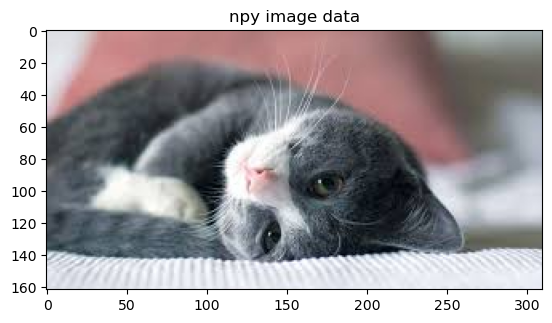

In [20]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("./data/cat.png")

# 색상의 문제 발생 BGR -> RGB 컨버터 필요
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(img)
# plt.title('org image data')
# plt.show()

np.save("image.npy", img)

img_data = np.load("image.npy")

plt.imshow(img_data)
plt.title('npy image data')
plt.show()

### Numpy를 사용하여 이미지 저장 시 효율성 비교

In [25]:
from PIL import Image

# 이미지 불러오기
img = Image.open('./data/cat.png').convert('L')   # 그레이 스케일 변경

# 이미지를 numpy 배열로 변환
img_array = np.array(img)

numpy.save()함수로 저장된 이미지는 데이터 자체를 저장하기 때문이다. 즉, 이미지의 배열 형태 그대로 저장이 되기 때문에, 파일 용량이 더 크게 나타나는 것이다.

In [28]:
# numpy.save() 함수를 사용하여 이미지 저장
np.save('lena_numpy', img_array)

# numpy.load() 함수를 사용하여 이미지 저장
img_array = np.load('lena_numpy.npy')

# 다시 PIL 이미지로 변환
img = Image.fromarray(np.uint8(img_array))
img.save('lena_numpy.png')

In [29]:
# PIL.Image.fromarray() 함수를 사용하여 이미지 저장
img = Image.fromarray(np.uint8(img_array))
img.save('lena_pil.png')

In [31]:
import os

# numpy.save() 함수로 저장된 이미지 파일 크기 비교
np_save_size = os.path.getsize('lena_numpy.npy')

# PIL.Image.fromarray() 함수로 저장된 이미지 파일 크기 비교
pil_save_size = os.path.getsize('lena_pil.png')

print(f'numpy.save() 함수로 저장한 파일 크기 : {np_save_size} bytes')
print(f'PIL.Image.fromarray() 함수로 저장한 파일 크기 : {pil_save_size} bytes')

numpy.save() 함수로 저장한 파일 크기 : 50348 bytes
PIL.Image.fromarray() 함수로 저장한 파일 크기 : 26808 bytes


반면 PIL.Image.fromarray() 함수로 저장된 이미지는 이미지 파일로 저장되기 때문에 파일 크기가 더 작게 나타난다. 이 때 저장되는 파일 포맷이나 압축 방식에 따라서 파일 크기가 달라질 수 있다.

## 성능 향상을 위한 Numpy 활용 tip
- 벡터화 된 연산 사용 : numpy는 벡터화된 연산을 지원하여 반복문 대신에 배열 연산을 사용할 수 있다. 이는 배열의 요소 단위로 동시에 연산을 수행하여 성능을 크게 향상시킨다. 따라서 가능한 경우 반복문 대신 벡터화된 연산을 활용해야 한다.
- 브로드캐스팅 활용: 브로드캐스팅은 NumPy에서 다른 크기의 배열 간에 연산을 수행할 때 자동으로 배열의 모양을 조정하는 기능이다. 이를 활용하면 명시적인 배열 복제를 피하고 성능을 개선할 수 있다. 브로드캐스팅을 최대한 활용하여 배열 연산을 수행하라.
- NumPy 함수 사용: NumPy는 수많은 유용한 함수를 제공한다. 이러한 함수를 사용하면 파이썬의 내장 함수보다 빠른 연산을 수행할 수 있다. 예를 들어, np.sum() 대신 파이썬의 sum() 함수를 사용하면 성능을 향상시킬 수 있다.
- 인덱싱과 슬라이싱 최적화: 인덱싱과 슬라이싱은 NumPy 배열에서 데이터에 접근하는 중요한 기능이다. 인덱싱과 슬라이싱을 사용할 때 매번 새로운 배열을 생성하는 것은 성능에 부정적인 영향을 미칠 수 있다. 따라서 필요한 경우에만 인덱싱과 슬라이싱을 사용하고, 가능한 경우에는 뷰(view)를 활용하여 복사를 피할 수 있다.
- 메모리 사용 최적화: NumPy는 배열의 데이터를 메모리에 연속적으로 저장하므로, 데이터의 크기가 크거나 다차원 배열인 경우 메모리 사용을 최적화해야 한다. 가능한 경우에는 데이터 타입을 적절히 선택하고, 메모리 뷰(view)를 활용하여 메모리를 공유하는 방법을 고려하라.
- 병렬 연산 활용: NumPy는 병렬 연산을 지원하지 않지만, NumPy 배열을 다루는 다른 라이브러리와 함께 사용하면 병렬 처리를 활용할 수 있다. 예를 들어, Numba나 Cython과 같은 라이브러리를 활용하여 NumPy 코드를 JIT 컴파일하고 병렬 처리를 수행할 수 있다.